### Install Required Packages

In [1]:
! pip install numpy pandas sklearn seaborn statsmodels

### Imports

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Dataset import and exploration

The dataset is located inside sklearn datasets package.

In [3]:
boston_dataset = load_boston()
boston_X_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_y_df = pd.DataFrame(boston_dataset.target, columns=['MEDV'])
print(boston_X_df)
print(boston_y_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

The graph here shows us that there are some outliers. This can be seen in ranges ~18-25 & ~50

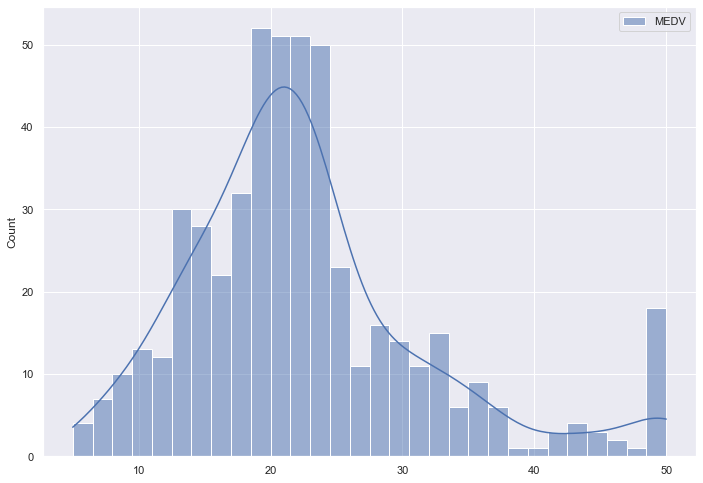

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(boston_y_df, bins=30, kde=True)
plt.show()

### Model definition

The fit of the model is based on the application of the equation $b = (X^TX)^{-1} X^TY$.
Also, the predict is based on the equation Y = Xb

In [5]:
class MultipleLinearRegression:

    def __init__(self):
        self.coefs_ = None

    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        """
        Fits the Linear Regression model
        :param X: dataframe contains the observations
        :param y: dataframe contains the target values
        """
        X = X.to_numpy()
        y = y.to_numpy()
        n = X.shape[0]
        
        # Append an extra column with ones to X
        ones_array = np.ones((n,1))
        X = np.hstack((ones_array, X))

        # Calculate (X^T X)
        X_transpose = np.transpose(X)
        X_transpose_X = np.dot(X_transpose, X)

        # Calculate the b = (X^T X)^-1 X^T Y
        inv_X_transponse_X = np.linalg.inv(X_transpose_X)
        self.coefs_ = np.dot(np.dot(inv_X_transponse_X, X_transpose), y)

    def predict(self, X: pd.DataFrame):
        """
        Predicts the values of the given data
        :param X: dataframe contains the observations to predict
        :return The predicted value
        """
        X = X.to_numpy()
        n = X.shape[0]

        # Append an extra column with ones to X
        ones_array = np.ones((n,1))
        X = np.hstack((ones_array, X))
        return np.dot(X, self.coefs_)

### Helper functions

Some methods that help us to estimate the $RSE$ & $R^2$

In [6]:
def rss(y_true, y_pred):
    """
    Calculates the Residual Sum of Squares
    :param y_true: The true values
    :param y_pred: The predicted values
    :return: RSS
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum(np.square(y_true - y_pred), dtype=np.float64)

def print_stats(y_true, y_pred):
    rss_ = rss(y_true, y_pred)
    rse = math.sqrt(rss_/(y_true.shape[0]-2))
    r2 = r2_score(y_true, y_pred)
    print(f'rss: {rss_}\nrse: {rse}\nr2 score: {r2}\n')
    print('Residual Plot')
    plt.axis('equal')
    sns.scatterplot(data=np.array(y_true - y_pred))
    plt.show()

### Split & train the model

The training batches below are executed with different train/test set ratios. These ratios are 90/10, 80/20, 70/30,
60/40.

Some observations:
- For the train/test 90/10 ratio it is observed that the $RSE$ for the test is `4.211194429358192` & the $R^2$
`0.7926083526613242` in contrast to $RSE$ for the train which is `4.752426479127483` & the $R^2$ is `0.734430389314123`
. One would expect that predicting the training's set values should give us more accurate results. Although this is
not a rule because the training set is much larger than the test set and is more likely to include many of the
outliers. So the lower scores are due to this reason.
- For the ratios 80/20, 70/30, 60/40 it is observed that $R^2_{test}$ < $R^2_{train}$ but for the $RSE$ is
happening the opposite ($RSE_{test}$ > $RSE_{train}$). The ratio 80/20 yielded the best results of all which shows
 us that
splitting in that ratio gives a well-balanced train set and enough data to test without extracting biased results
(which happens in 90/10 ratio).
- Also, as the number of elements of the train set are decreasing, the $RSE$ of train
is decreasing too, but the $RSE$ of the test is increasing. This can be translated to that the training procedure has a
small amount of data in order to train & generalize the model properly in addition to many of the outliers that have
been moved to the test set.

Split: 90.0/10.0 (train/test)
Bias:
[37.06602854]

Coefficients:
[[-1.25856659e-01]
 [ 4.84257396e-02]
 [ 1.84085281e-02]
 [ 3.08509569e+00]
 [-1.73277018e+01]
 [ 3.61674713e+00]
 [ 2.19181853e-03]
 [-1.49361132e+00]
 [ 3.19979200e-01]
 [-1.27294649e-02]
 [-9.27469086e-01]
 [ 9.50912468e-03]
 [-5.33592471e-01]]

=== Stats for y_test ===
rss: 868.9737675710161
rse: 4.211194429358192
r2 score: 0.7926083526613242

Residual Plot


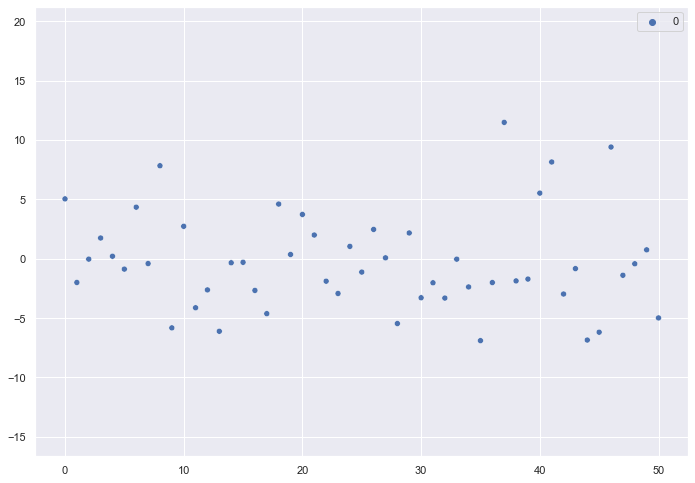

=== Stats for y_train ===
rss: 10231.257520098956
rse: 4.752426479127483
r2 score: 0.734430389314123

Residual Plot


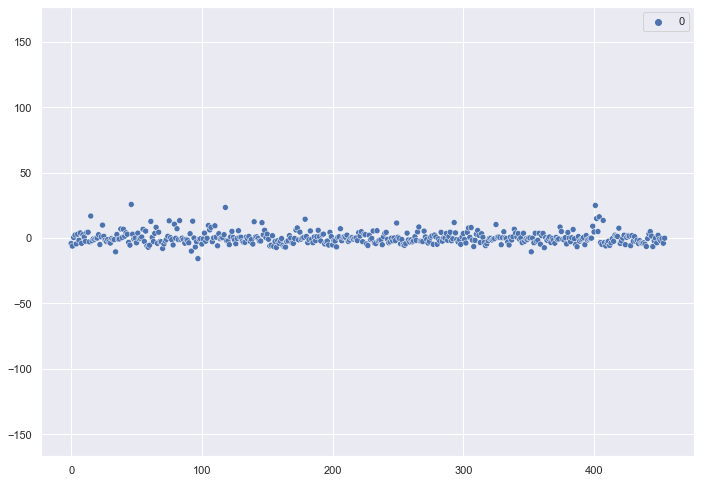

Split: 80.0/20.0 (train/test)
Bias:
[35.55487454]

Coefficients:
[[-1.15966452e-01]
 [ 4.71249231e-02]
 [ 8.25980146e-03]
 [ 3.23404531e+00]
 [-1.66865890e+01]
 [ 3.88410651e+00]
 [-1.08974442e-02]
 [-1.54129540e+00]
 [ 2.93208309e-01]
 [-1.34059383e-02]
 [-9.06296429e-01]
 [ 8.80823439e-03]
 [-4.57723846e-01]]

=== Stats for y_test ===
rss: 2592.7978869360036
rse: 5.091952363225724
r2 score: 0.7263451459702325

Residual Plot


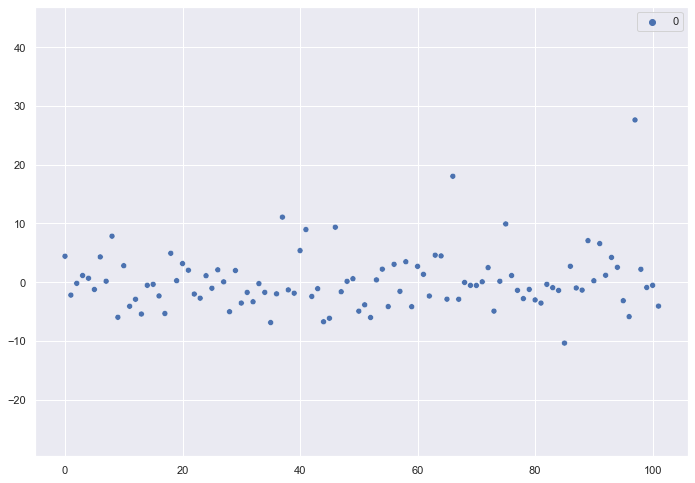

=== Stats for y_train ===
rss: 8563.644528579474
rse: 4.6154737925590785
r2 score: 0.7415244219726307

Residual Plot


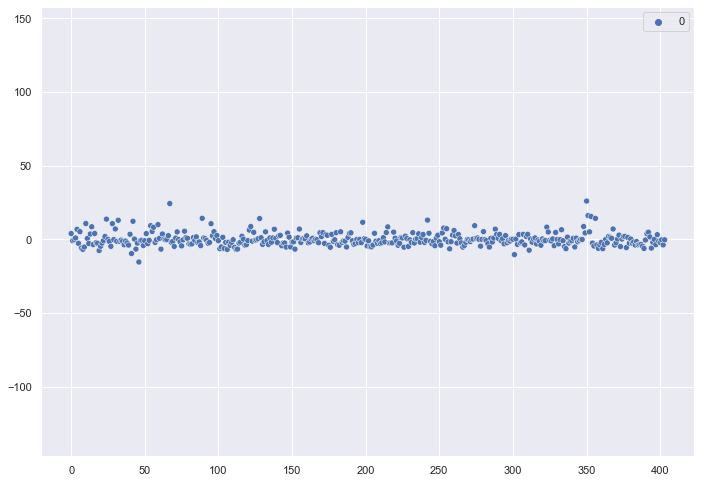

Split: 70.0/30.0 (train/test)
Bias:
[36.35704138]

Coefficients:
[[-1.22569795e-01]
 [ 5.56776996e-02]
 [-8.83428230e-03]
 [ 4.69344849e+00]
 [-1.44357828e+01]
 [ 3.28008033e+00]
 [-3.44778157e-03]
 [-1.55214419e+00]
 [ 3.26249618e-01]
 [-1.40665500e-02]
 [-8.03274915e-01]
 [ 9.35368715e-03]
 [-5.23477529e-01]]

=== Stats for y_test ===
rss: 4568.206982683103
rse: 5.518578912898442
r2 score: 0.7121818377409047

Residual Plot


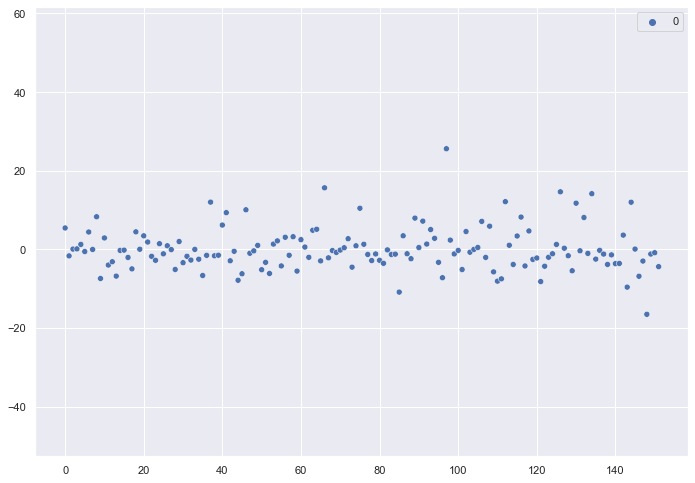

=== Stats for y_train ===
rss: 6752.085801028037
rse: 4.379733089440353
r2 score: 0.7465991966746854

Residual Plot


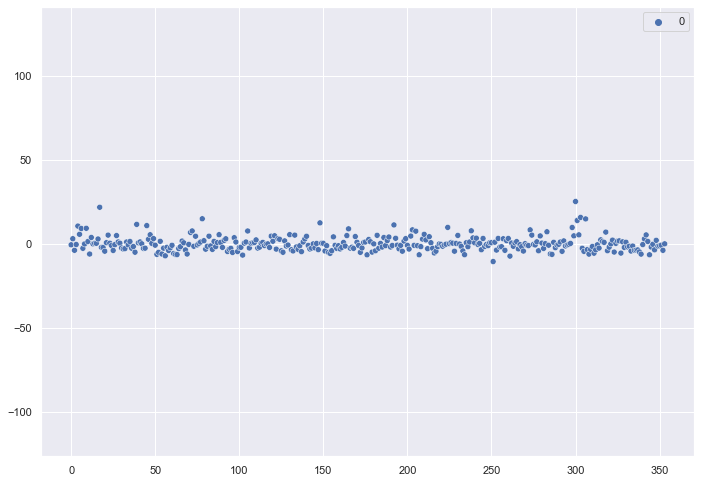

Split: 60.0/40.0 (train/test)
Bias:
[31.15180518]

Coefficients:
[[-9.11634623e-02]
 [ 4.97311579e-02]
 [ 1.04332182e-02]
 [ 2.57824667e+00]
 [-1.53472648e+01]
 [ 3.87674688e+00]
 [-6.45064385e-03]
 [-1.46993464e+00]
 [ 3.30364542e-01]
 [-1.56834777e-02]
 [-7.27226512e-01]
 [ 9.47079274e-03]
 [-4.69419821e-01]]

=== Stats for y_test ===
rss: 6001.118047494772
rse: 5.464092668870454
r2 score: 0.7306110682121729

Residual Plot


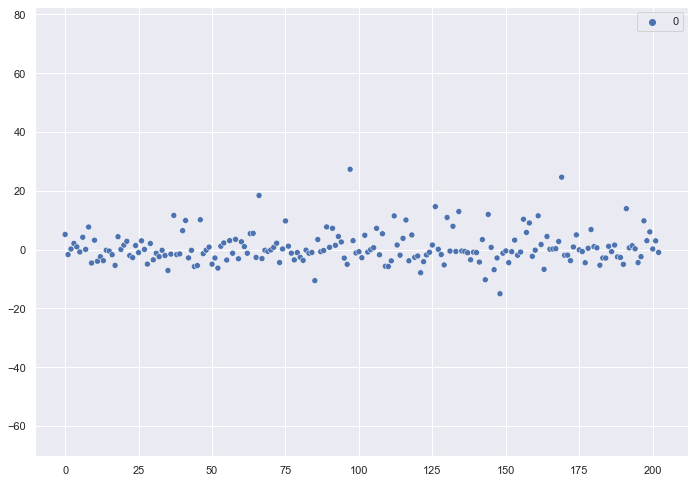

=== Stats for y_train ===
rss: 5284.778878537454
rse: 4.190155714539086
r2 score: 0.7404634329594084

Residual Plot


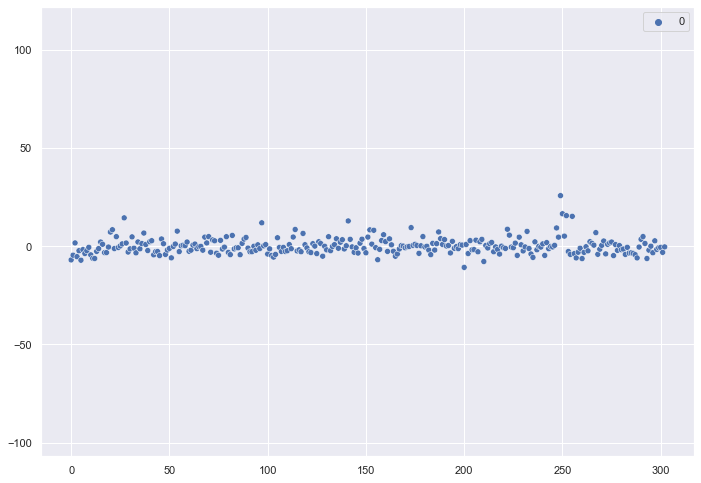

In [7]:
for split in [0.1, 0.2, 0.3, 0.4]:
    X_train, X_test, y_train, y_test = train_test_split(boston_X_df, boston_y_df, test_size=split, random_state=4)

    model = MultipleLinearRegression()
    model.fit(X_train, y_train)

    print(f'Split: {(1.0 - split) * 100.0}/{split * 100.0} (train/test)')
    print(f'Bias:\n{model.coefs_[0]}\n')
    print(f'Coefficients:\n{model.coefs_[1:]}\n')

    y_test_pred = model.predict(X_test)
    print('=== Stats for y_test ===')
    print_stats(y_test, y_test_pred)

    y_train_pred = model.predict(X_train)
    print('=== Stats for y_train ===')
    print_stats(y_train, y_train_pred)


### Compare with sklearn's LinearRegression (90/10 train/test ratio)

Bias:
[37.06602854]

Coefficients:
[[-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
  -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
   3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
  -5.33592471e-01]]

=== Stats for y_test ===
rss: 850.6143318700656
rse: 4.1664704679876925
r2 score: 0.7969900656155273

Residual Plot


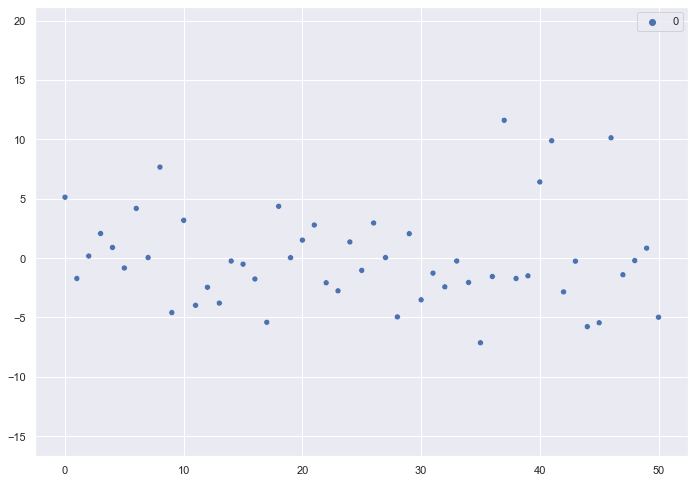

In [8]:
X_train, X_test, y_train, y_test = train_test_split(boston_X_df, boston_y_df, test_size=0.1, random_state=4)
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

print(f'Bias:\n{sk_model.intercept_}\n')
print(f'Coefficients:\n{sk_model.coef_}\n')

y_test_pred = model.predict(X_test)
print('=== Stats for y_test ===')
print_stats(y_test, y_test_pred)


### Random feature removal

Here we train the model by excluding randomly features of the dataset. The excluded features are
`['INDUS', 'NOX', 'AGE'], ['RAD', 'PTRATIO', 'ZN'], ['CRIM', 'DIS', 'B']` in the 3 training sessions equivalently
with 80/20 train/test ratio. The results for all the combinations are worse comparing with the previous models
which all the features were included. This happens because the removed features may have high impact in
the calculation of Y (MEDV), which leads to low $R^2$ and high $RSE$.

Removed attributes: ['INDUS', 'NOX', 'AGE']
        CRIM    ZN  CHAS     RM     DIS  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   0.0  6.575  4.0900  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   0.0  6.421  4.9671  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   0.0  7.185  4.9671  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   0.0  6.998  6.0622  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   0.0  7.147  6.0622  3.0  222.0     18.7  396.90   5.33
..       ...   ...   ...    ...     ...  ...    ...      ...     ...    ...
501  0.06263   0.0   0.0  6.593  2.4786  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0   0.0  6.120  2.2875  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0   0.0  6.976  2.1675  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0   0.0  6.794  2.3889  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0   0.0  6.030  2.5050  1.0  273.0     21.0  396.90   7.88

[506 rows x 10 columns]
Bias:
[22.17260864]

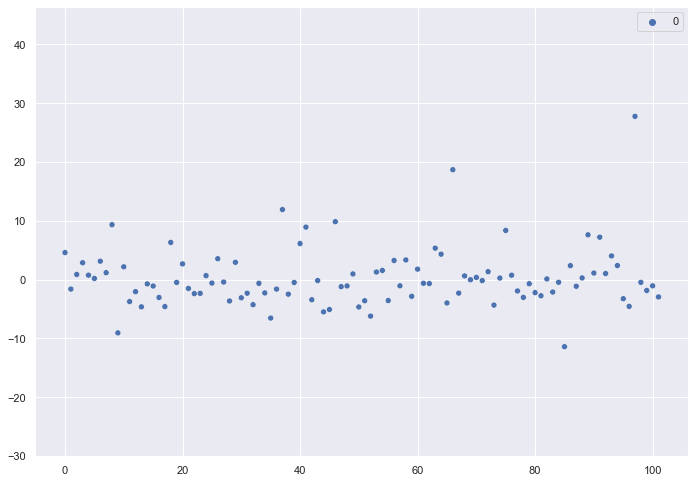

=== Stats for y_train ===
rss: 9025.278435298453
rse: 4.738242435897454
r2 score: 0.727590974539355

Residual Plot


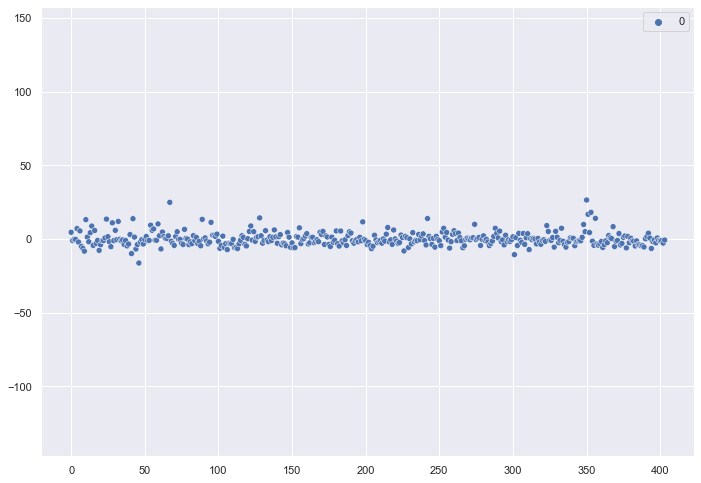

Removed attributes: ['RAD', 'PTRATIO', 'ZN']
        CRIM  INDUS  CHAS    NOX     RM   AGE     DIS    TAX       B  LSTAT
0    0.00632   2.31   0.0  0.538  6.575  65.2  4.0900  296.0  396.90   4.98
1    0.02731   7.07   0.0  0.469  6.421  78.9  4.9671  242.0  396.90   9.14
2    0.02729   7.07   0.0  0.469  7.185  61.1  4.9671  242.0  392.83   4.03
3    0.03237   2.18   0.0  0.458  6.998  45.8  6.0622  222.0  394.63   2.94
4    0.06905   2.18   0.0  0.458  7.147  54.2  6.0622  222.0  396.90   5.33
..       ...    ...   ...    ...    ...   ...     ...    ...     ...    ...
501  0.06263  11.93   0.0  0.573  6.593  69.1  2.4786  273.0  391.99   9.67
502  0.04527  11.93   0.0  0.573  6.120  76.7  2.2875  273.0  396.90   9.08
503  0.06076  11.93   0.0  0.573  6.976  91.0  2.1675  273.0  396.90   5.64
504  0.10959  11.93   0.0  0.573  6.794  89.3  2.3889  273.0  393.45   6.48
505  0.04741  11.93   0.0  0.573  6.030  80.8  2.5050  273.0  396.90   7.88

[506 rows x 10 columns]
Bias:
[9.33900846]

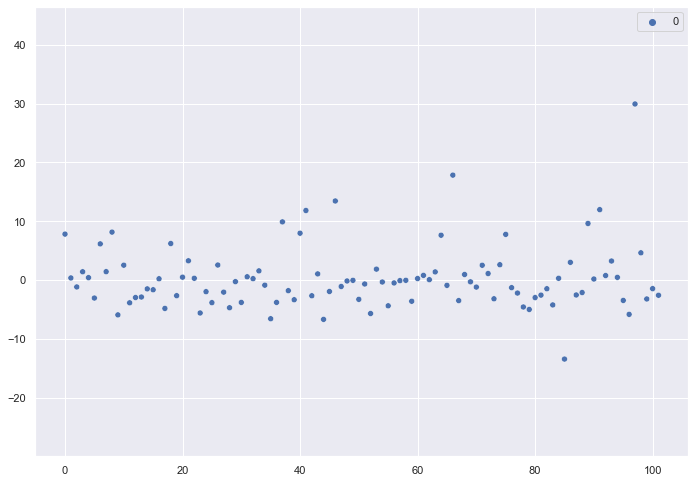

=== Stats for y_train ===
rss: 10128.947882123282
rse: 5.019600359239352
r2 score: 0.694279036232346

Residual Plot


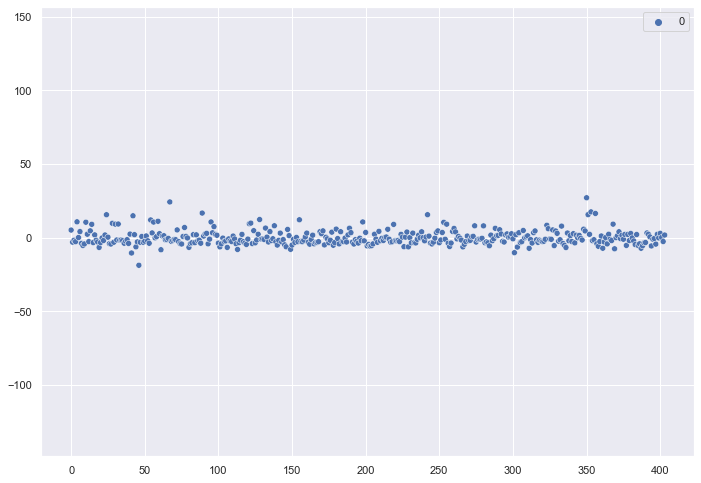

Removed attributes: ['CRIM', 'DIS', 'B']
       ZN  INDUS  CHAS    NOX     RM   AGE  RAD    TAX  PTRATIO  LSTAT
0    18.0   2.31   0.0  0.538  6.575  65.2  1.0  296.0     15.3   4.98
1     0.0   7.07   0.0  0.469  6.421  78.9  2.0  242.0     17.8   9.14
2     0.0   7.07   0.0  0.469  7.185  61.1  2.0  242.0     17.8   4.03
3     0.0   2.18   0.0  0.458  6.998  45.8  3.0  222.0     18.7   2.94
4     0.0   2.18   0.0  0.458  7.147  54.2  3.0  222.0     18.7   5.33
..    ...    ...   ...    ...    ...   ...  ...    ...      ...    ...
501   0.0  11.93   0.0  0.573  6.593  69.1  1.0  273.0     21.0   9.67
502   0.0  11.93   0.0  0.573  6.120  76.7  1.0  273.0     21.0   9.08
503   0.0  11.93   0.0  0.573  6.976  91.0  1.0  273.0     21.0   5.64
504   0.0  11.93   0.0  0.573  6.794  89.3  1.0  273.0     21.0   6.48
505   0.0  11.93   0.0  0.573  6.030  80.8  1.0  273.0     21.0   7.88

[506 rows x 10 columns]
Bias:
[27.00838715]

Coefficients:
[[-1.52470080e-03]
 [ 8.84594646e-02]
 [ 3.4234

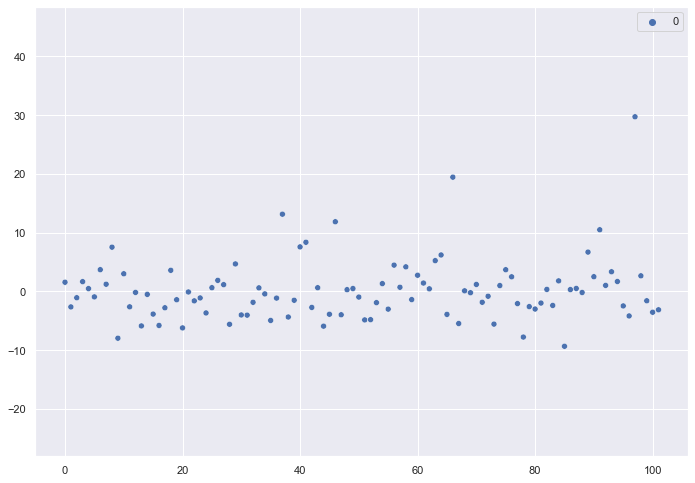

=== Stats for y_train ===
rss: 9942.143335585195
rse: 4.973097610118282
r2 score: 0.699917338123957

Residual Plot


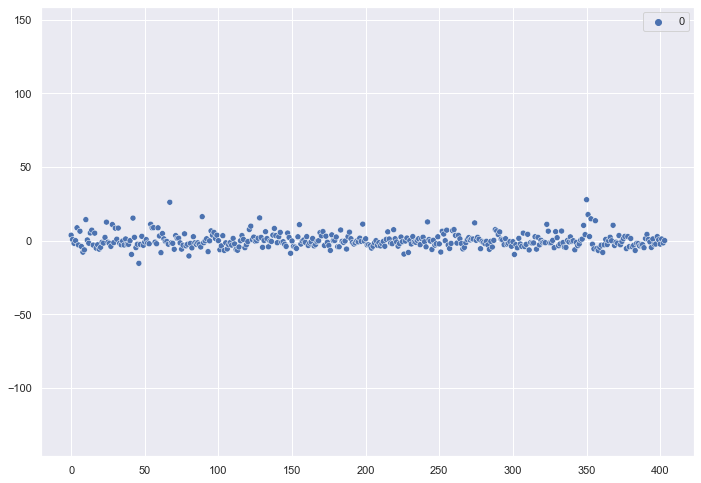

In [9]:
to_remove = [['INDUS', 'NOX', 'AGE'], ['RAD', 'PTRATIO', 'ZN'], ['CRIM', 'DIS', 'B']]

for removal in to_remove:
    df_ = boston_X_df.copy()
    df_ = df_.drop(removal, axis=1)
    print(f'Removed attributes: {str(removal)}')
    print(df_)

    X_train, X_test, y_train, y_test = train_test_split(df_, boston_y_df, test_size=0.2, random_state=4)
    model = MultipleLinearRegression()
    model.fit(X_train, y_train)

    print(f'Bias:\n{model.coefs_[0]}\n')
    print(f'Coefficients:\n{model.coefs_[1:]}\n')

    y_test_pred = model.predict(X_test)
    print('=== Stats for y_test ===')
    print_stats(y_test, y_test_pred)

    y_train_pred = model.predict(X_train)
    print('=== Stats for y_train ===')
    print_stats(y_train, y_train_pred)


### Correlation matrix

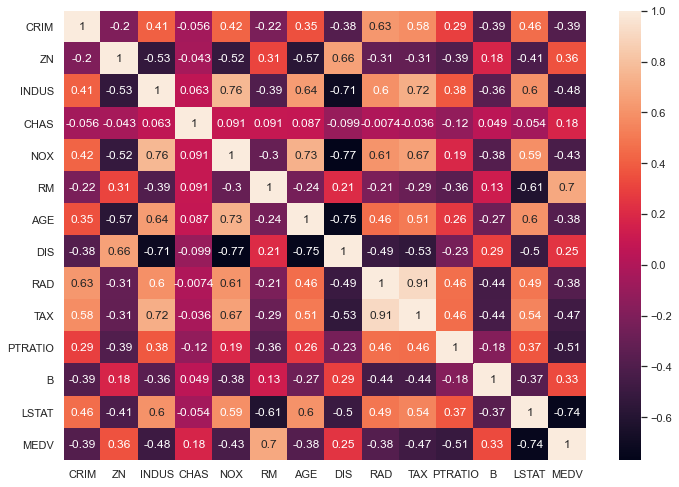

In [10]:
df_ = boston_X_df.join(boston_y_df)
corrMatrix = df_.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


### Select features that have strong (positive/negative) correlation with Y

The correlation matrix above shows us that `NOX`-`DIS`, `INDUS`-`AGE`, `RAD`-`TAX` have high (positive or negative)
correlation on each other and are safe to be removed. Also `LSAT`, `RM` & `PTRATIO` have high correlation with `MEDV`.
By using less features we will have a less noisy dataset, features that have small correlation with the target
attribute are considered as noise. Removing them will be produced a more meaningful dataset which in theory the final
model will be more efficient. Finally, `LSAT`, `RM` & `PTRATIO` will be our main features of our model.

     LSTAT     RM  PTRATIO
0     4.98  6.575     15.3
1     9.14  6.421     17.8
2     4.03  7.185     17.8
3     2.94  6.998     18.7
4     5.33  7.147     18.7
..     ...    ...      ...
501   9.67  6.593     21.0
502   9.08  6.120     21.0
503   5.64  6.976     21.0
504   6.48  6.794     21.0
505   7.88  6.030     21.0

[506 rows x 3 columns]


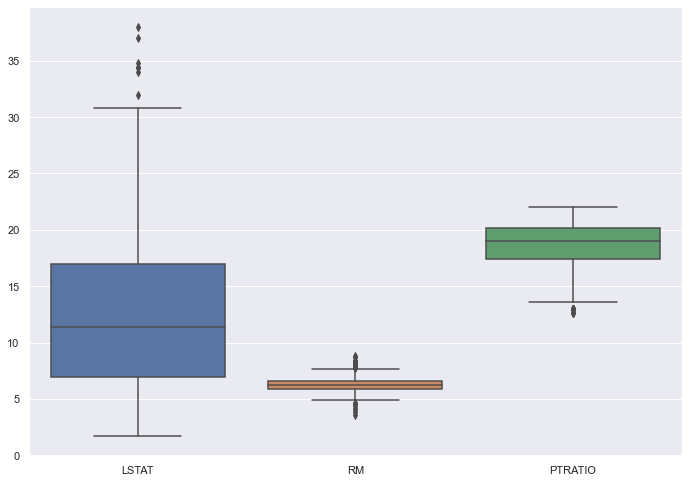

In [11]:
df_ = boston_X_df[['LSTAT', 'RM', 'PTRATIO']].copy()
print(df_)

sns.boxplot(data=df_)
plt.show()

### Apply log to LSAT and apply square to RM to rescale the data

The boxplot above shows that `LSAT` has many outliers with values >30 and `PTRATIO` has outliers too with values <14.
In order to avoid training a set with the extra noise of the outliers, I preferred to convert the initial values of
`LSAT` with the `log` values of them and for `RM` with the square values.

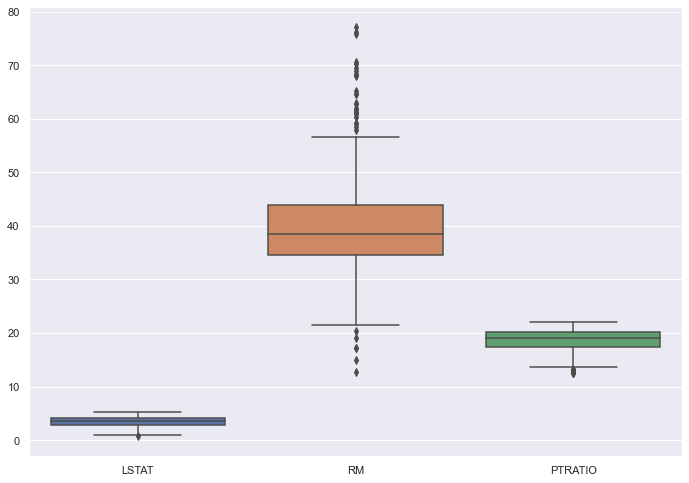

In [12]:
df_['LSTAT'] = np.log2(df_['LSTAT'])
df_['RM'] = df_['RM'] ** 2

sns.boxplot(data=df_)
plt.show()

### Retrain model

And the result is to receive a well-balanced model with scores $R^2_{test}=0.7559278759803347$, $RSE_{test}=4
.808856796377783$, $R^2_{train}=0.7393220432059573$, $RSE_{train}=4.6350954917950125$, comparing to the scores
$R^2_{test}=0.7415244219726307$, $RSE_{test}=5.091952363225724$, $R^2_{train}=0.7263451459702325$,
 $RSE_{train}=4.6154737925590785$ of the model which includes all the given features. The scores with the model of 3
attributes are almost similar both in test & train sets. That leads us to make the assumption that the model performs
the same in the two datasets, which makes it more generalized.

Bias:
[43.08351637]

Coefficients:
[[-5.51350739]
 [ 0.31032877]
 [-0.76763774]]

=== Stats for y_test ===
rss: 2312.510368806879
rse: 4.808856796377783
r2 score: 0.7559278759803347

Residual Plot


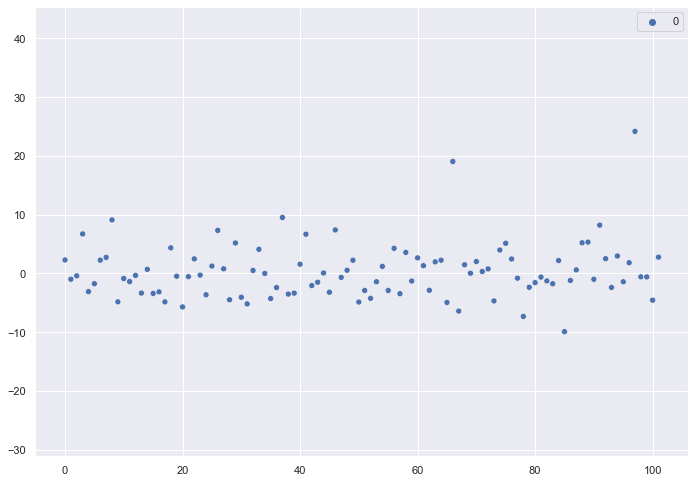

=== Stats for y_train ===
rss: 8636.612307659496
rse: 4.6350954917950125
r2 score: 0.7393220432059573

Residual Plot


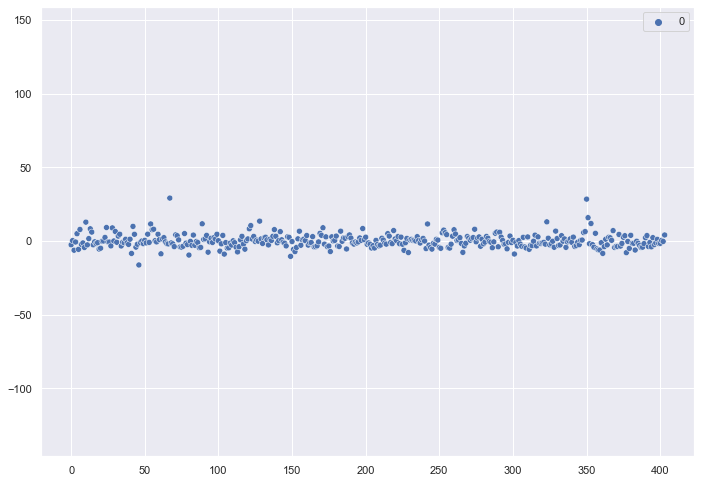

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_, boston_y_df, test_size=0.2, random_state=4)
model = MultipleLinearRegression()
model.fit(X_train, y_train)

print(f'Bias:\n{model.coefs_[0]}\n')
print(f'Coefficients:\n{model.coefs_[1:]}\n')

y_test_pred = model.predict(X_test)
print('=== Stats for y_test ===')
print_stats(y_test, y_test_pred)

y_train_pred = model.predict(X_train)
print('=== Stats for y_train ===')
print_stats(y_train, y_train_pred)